# Funciones de activación

In [ ]:
#!pip install tensorflow numpy matplotlib


## 1. Identidad

### Descripción
La función de activación de identidad es la función más simple, que simplemente devuelve el valor de entrada sin cambios. Es útil en tareas de regresión donde la salida es una cantidad continua.

### Fórmula
$f(x) = x $

### Gráfica

![Identidad](./media/funciones/identidad.png)

## 2. Escalón

### Descripción
La función de activación de escalón devuelve 1 si la entrada es mayor o igual a cero, y 0 en caso contrario. Se usa en problemas de clasificación binaria simples.

### Fórmula
$ f(x) = \begin{cases} 
1 & \text{si } x \geq 0 \\
0 & \text{si } x < 0 
\end{cases}$

### Gráfica
![Escalón](./media/funciones/escalon.png)

## 3. Lineal a Tramos

### Descripción
La función lineal a tramos puede modelar relaciones con diferentes pendientes y puntos de intersección en diferentes tramos.

### Fórmula
$f(x) = \begin{cases} 
a x + b & \text{si } x < 0 \\
c x + d & \text{si } x \geq 0 
\end{cases} $

### Gráfica
![Lineal a Tramos](./media/funciones/lineal_a_tramos.png)

## 4. Gaussiana

### Descripción
La activación gaussiana es usada en redes neuronales de base radial (RBF) y tiene forma de campana, centrada en cero.

### Fórmula
$f(x) = e^{-\frac{x^2}{2\sigma^2}}$

### Gráfica
![Gaussiana](./media/funciones/gaussiana.png)

## 5. Sinusoidal

### Descripción
La activación sinusoidal es útil en problemas que requieren modelar periodicidad.

### Fórmula
$f(x) = \sin(x) $

### Gráfica
![Sinusoidal](./media/funciones/sinusoidal.png)

## 6. Sigmoidea

### Descripción
La función sigmoidea se usa comúnmente en la capa de salida para problemas de clasificación binaria. Su forma en "S" convierte las entradas en una probabilidad.

### Fórmula
$f(x) = \frac{1}{1 + e^{-x}} $

### Gráfica
![Sigmoidea](./media/funciones/sigmoidea.png)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de las funciones de activación
def identidad(x):
    return x

def escalon(x):
    return np.where(x >= 0, 1, 0)

def lineal_a_tramos(x, l=1):
    return np.where(x < -l, -1, np.where(x > l, 1, x))

def gaussiana(x, B=1):
    return np.exp(-B * x**2)

def sinusoidal(x, A=1, omega=1, phi=0):
    return A * np.sin(omega * x + phi)

def sigmoidea(x):
    return 1 / (1 + np.exp(-x))

# Valores de entrada
x = np.linspace(-10, 10, 400)

# Función para graficar y guardar
def plot_activation_function(x, func, title, filename):
    y = func(x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.savefig(filename)
    plt.close()

# Graficar y guardar todas las funciones de activación
plot_activation_function(x, identidad, 'Identidad', './media/funciones/identidad.png')
plot_activation_function(x, escalon, 'Escalón', './media/funciones/escalon.png')
plot_activation_function(x, lineal_a_tramos, 'Lineal a Tramos', './media/funciones/lineal_a_tramos.png')
plot_activation_function(x, gaussiana, 'Gaussiana', './media/funciones/gaussiana.png')
plot_activation_function(x, sinusoidal, 'Sinusoidal', './media/funciones/sinusoidal.png')
plot_activation_function(x, sigmoidea, 'Sigmoidea', './media/funciones/sigmoidea.png')



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generar datos de ejemplo
def generate_data():
    X = np.linspace(-10, 10, 1000).reshape(-1, 1)
    y = np.sin(X) + 0.1 * np.random.randn(*X.shape)
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Función para plotear resultados
def plot_results(X_train, X_test, y_train, y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, label='Train data', color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, label='Test data', color='green', alpha=0.5)
    plt.scatter(X_test, y_pred, label='Predictions', color='red', alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()



7/7 [==============================] - 0s 1ms/step


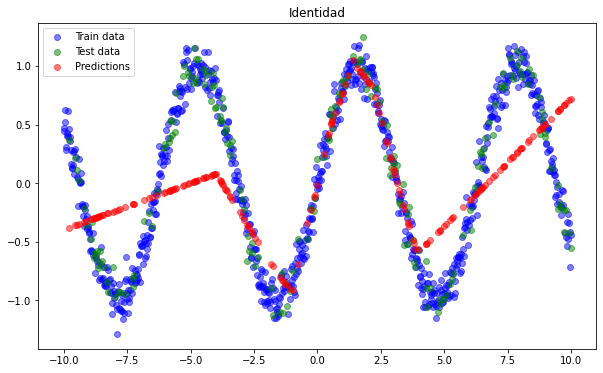

In [12]:
# Datos
X_train, X_test, y_train, y_test = generate_data()

# Modelo
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')  # Identidad
])

model.compile(optimizer=Adam(), loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

y_pred = model.predict(X_test)

# Resultados
plot_results(X_train, X_test, y_train, y_test, y_pred, 'Identidad')



7/7 [==============================] - 0s 2ms/step


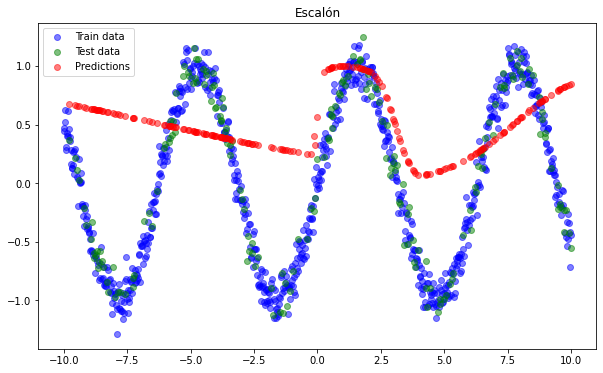

In [14]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def step_activation(x):
    return K.sigmoid(100 * x)  # Aproximación diferenciable

get_custom_objects().update({'step_activation': Activation(step_activation)})

# Modelo
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='step_activation')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy')
model.fit(X_train, (y_train > 0).astype(int), epochs=100, verbose=0)

y_pred = model.predict(X_test)

# Resultados
plot_results(X_train, X_test, y_train, y_test, y_pred, 'Escalón')



7/7 [==============================] - 0s 2ms/step


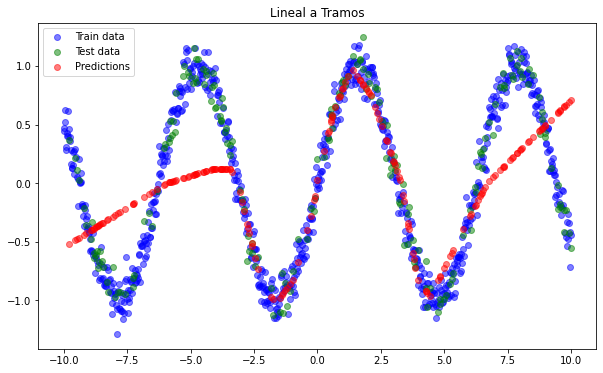

In [15]:
def piecewise_linear_activation(x):
    return K.switch(x < 0, x, 0.5 * x)

get_custom_objects().update({'piecewise_linear_activation': Activation(piecewise_linear_activation)})

# Modelo
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='piecewise_linear_activation')
])

model.compile(optimizer=Adam(), loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

y_pred = model.predict(X_test)

# Resultados
plot_results(X_train, X_test, y_train, y_test, y_pred, 'Lineal a Tramos')


7/7 [==============================] - 0s 2ms/step


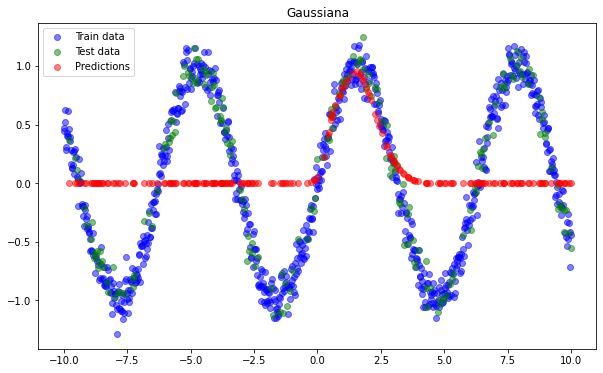

In [16]:
def gaussian_activation(x):
    return K.exp(-K.square(x))

get_custom_objects().update({'gaussian_activation': Activation(gaussian_activation)})

# Modelo
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='gaussian_activation')
])

model.compile(optimizer=Adam(), loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

y_pred = model.predict(X_test)

# Resultados
plot_results(X_train, X_test, y_train, y_test, y_pred, 'Gaussiana')


7/7 [==============================] - 0s 2ms/step


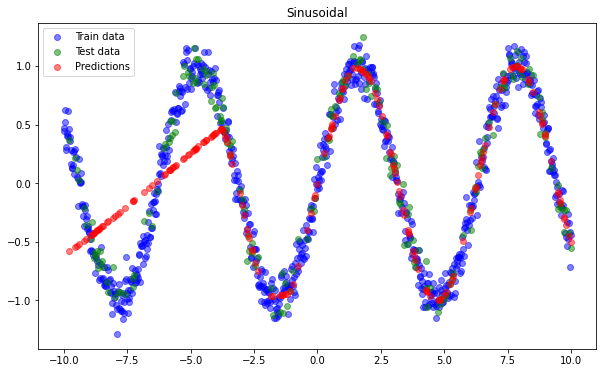

In [17]:
def sinusoidal_activation(x):
    return K.sin(x)

get_custom_objects().update({'sinusoidal_activation': Activation(sinusoidal_activation)})

# Modelo
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sinusoidal_activation')
])

model.compile(optimizer=Adam(), loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

y_pred = model.predict(X_test)

# Resultados
plot_results(X_train, X_test, y_train, y_test, y_pred, 'Sinusoidal')


7/7 [==============================] - 0s 1ms/step


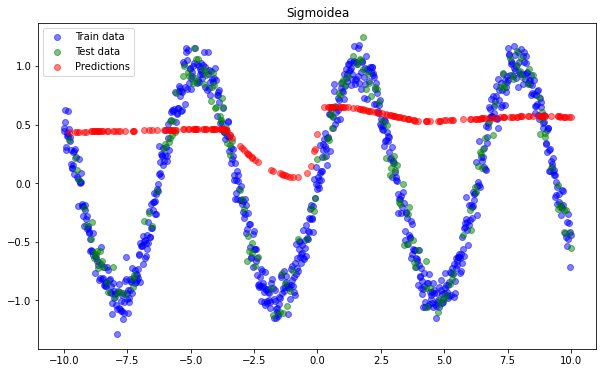

In [18]:
# Modelo
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy')
model.fit(X_train, (y_train > 0).astype(int), epochs=100, verbose=0)

y_pred = model.predict(X_test)

# Resultados
plot_results(X_train, X_test, y_train, y_test, y_pred, 'Sigmoidea')
